# **Overview**

1. Univariate analysis

2. Bivariate analysis-linear regression

3. Selection of most important explanatory variables

4. Multiple linear regression for diamond dataset to get a prediction for Professor's diamond requirements.

In [ ]:
import pandas as pd
df1 = pd.read_excel ('MBA6636_SM21_Professor_Proposes_Data.xlsx')
print (df1)

     Carat Colour Clarity Cut Certification Polish Symmetry  Price  Wholesaler
0     0.92      I     SI2   G           AGS      V        V   3000           1
1     0.92      I     SI2   V           AGS      G        G   3000           1
2     0.82      F     SI2   I           GIA      X        X   3004           1
3     0.81      G     SI1   I           GIA      X        V   3004           1
4     0.90      J     VS2   V           GIA      V        V   3006           1
..     ...    ...     ...  ..           ...    ...      ...    ...         ...
435   0.30      K    VVS1   V           GIA      X        V    547           3
436   0.30      H     SI1   G           GIA      V        V    559           3
437   0.30      H     SI1   X           GIA      V        V    559           3
438   0.30      H     SI1   V           GIA      X        X    559           3
439   0.30      H     SI1   X           GIA      V        X    559           3

[440 rows x 9 columns]


## **Exploratory Data Analysis**

# **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


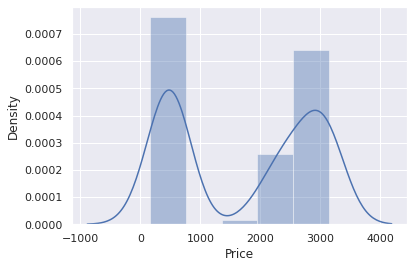

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); 

ax = sns.distplot(df1.Price)

Here we can observe that the price has a bimodal distribution

In [ ]:
df1['Price'].describe()

count     440.000000
mean     1716.738636
std      1175.689127
min       160.000000
25%       520.000000
50%      2169.000000
75%      3012.500000
max      3145.000000
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


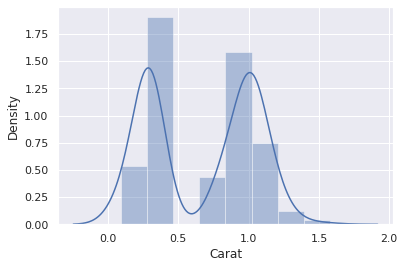

In [ ]:
ax = sns.distplot(df1.Carat)

Here we can observe that the carat has a bimodal distribution

In [ ]:
df1['Carat'].describe()


count    440.00000
mean       0.66925
std        0.37980
min        0.09000
25%        0.30000
50%        0.81000
75%        1.01000
max        1.58000
Name: Carat, dtype: float64

In [ ]:

df1['Clarity']


0       SI2
1       SI2
2       SI2
3       SI1
4       VS2
       ... 
435    VVS1
436     SI1
437     SI1
438     SI1
439     SI1
Name: Clarity, Length: 440, dtype: object

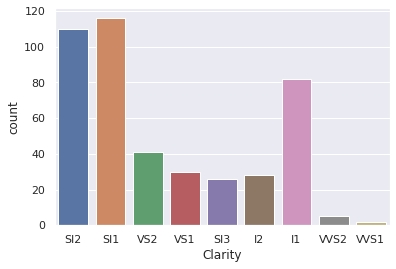

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
 
# count plot on single categorical variable
sns.countplot(x ='Clarity', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Clarity which states that SL1 has the most counts and WS1 has the lowest counts

Here, we are putting dummy variables in clarity as the level of importance of the clarity parameter. Where '1' signifies 'very few inclusions visible' which is I1 and '9' signifies 'very few inclusions at 30X'

In [ ]:
df1["Clarity"].replace({"I1": "1", "I2": "2", "SI1": "3", "SI2": "4", "SI3": "5", "VS1": "6", "VS2": "7", "VVS1": "8", "VVS2": "9"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,I,4,G,AGS,V,V,3000,1
1,0.92,I,4,V,AGS,G,G,3000,1
2,0.82,F,4,I,GIA,X,X,3004,1
3,0.81,G,3,I,GIA,X,V,3004,1
4,0.90,J,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,K,8,V,GIA,X,V,547,3
436,0.30,H,3,G,GIA,V,V,559,3
437,0.30,H,3,X,GIA,V,V,559,3
438,0.30,H,3,V,GIA,X,X,559,3


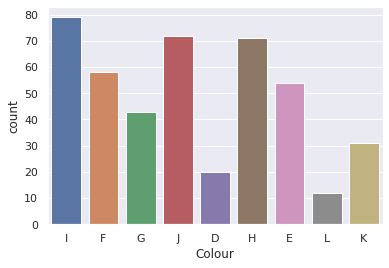

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Colour', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Colour which states that I has the most counts and L has the lowest counts

Here, we are putting dummy variables in colou as the level of importance of the colour parameters where we classify them into two classes 'Colorless' and 'yellow'. Where '1' signifies 'yellow' and '2' signifies 'Colorless'

In [ ]:
df1["Colour"].replace({"D": "2", "E": "2", "F": "2", "G": "2", "H": "2", "I": "2", "J": "1", "K": "1", "L": "1"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,G,AGS,V,V,3000,1
1,0.92,2,4,V,AGS,G,G,3000,1
2,0.82,2,4,I,GIA,X,X,3004,1
3,0.81,2,3,I,GIA,X,V,3004,1
4,0.90,1,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,V,GIA,X,V,547,3
436,0.30,2,3,G,GIA,V,V,559,3
437,0.30,2,3,X,GIA,V,V,559,3
438,0.30,2,3,V,GIA,X,X,559,3


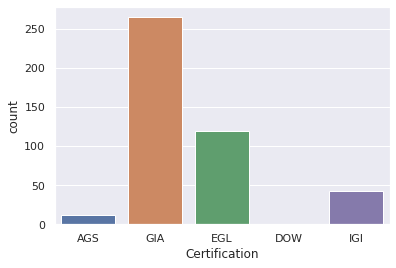

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Certification', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Certification which states that GIA has the most counts and AGS has the lowest counts

Here, we are putting dummy variables in colour as the level of importance of the certificate parameters where we classify them into two classes 'AGS-GIA' and 'rest of the parameters'. Where '1' signifies 'rest of the parameters' and '2' is 'AGS-GIA'

In [ ]:
df1["Certification"].replace({"AGS": "2", "GIA": "2", "IGI": "1", "EGL": "1","DOW": "1" }, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,G,2,V,V,3000,1
1,0.92,2,4,V,2,G,G,3000,1
2,0.82,2,4,I,2,X,X,3004,1
3,0.81,2,3,I,2,X,V,3004,1
4,0.90,1,7,V,2,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,V,2,X,V,547,3
436,0.30,2,3,G,2,V,V,559,3
437,0.30,2,3,X,2,V,V,559,3
438,0.30,2,3,V,2,X,X,559,3


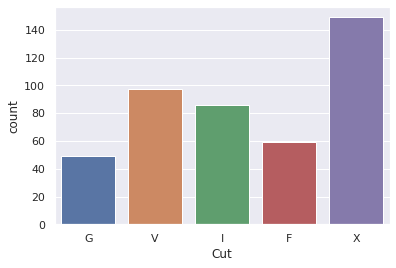

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Cut', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Cut which states that X has the most counts and G has the lowest counts

Here, we are putting dummy variables in cut as the level of importance of the cut parameters where we classify them into two categories 'Fair-Good' and 'Very good-ideal of the parameters'. Where '1' signifies 'Fair-Good' which is and '2' 'Very good-ideal of the parameters'

In [ ]:
df1["Cut"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,V,V,3000,1
1,0.92,2,4,2,2,G,G,3000,1
2,0.82,2,4,2,2,X,X,3004,1
3,0.81,2,3,2,2,X,V,3004,1
4,0.90,1,7,2,2,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,X,V,547,3
436,0.30,2,3,1,2,V,V,559,3
437,0.30,2,3,2,2,V,V,559,3
438,0.30,2,3,2,2,X,X,559,3


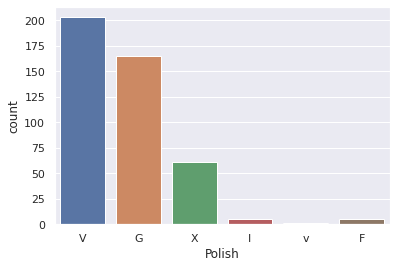

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Polish', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Polish which states that V has the most counts and I has the lowest counts.

Here, we are putting dummy variables in polish as the level of importance of the polish parameters where we classify them into two categories 'Fair-Good' and 'Very good-ideal of the parameters'. Where '1' signifies 'Fair-Good' which is and '2' 'Very good-ideal of the parameters'

In [ ]:
df1["Polish"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2", "v": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,V,3000,1
1,0.92,2,4,2,2,1,G,3000,1
2,0.82,2,4,2,2,2,X,3004,1
3,0.81,2,3,2,2,2,V,3004,1
4,0.90,1,7,2,2,2,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,V,547,3
436,0.30,2,3,1,2,2,V,559,3
437,0.30,2,3,2,2,2,V,559,3
438,0.30,2,3,2,2,2,X,559,3


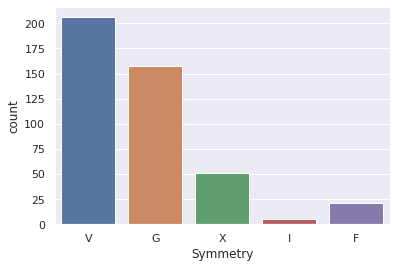

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Symmetry', data = df1)
 
# Show the plot
plt.show()

Here, we basically observe the individual counts of Symmetry which states that V has the most counts and I has the lowest counts

Here, we are putting dummy variables in symmetry as the level of importance of the symmetry parameters where we classify them into two categories 'Fair-Good' and 'Very good-ideal of the parameters'. Where '1' signifies 'Fair-Good' which is and '2' 'Very good-ideal of the parameters'

In [ ]:
df1["Symmetry"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,2,3000,1
1,0.92,2,4,2,2,1,1,3000,1
2,0.82,2,4,2,2,2,2,3004,1
3,0.81,2,3,2,2,2,2,3004,1
4,0.90,1,7,2,2,2,2,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,2,547,3
436,0.30,2,3,1,2,2,2,559,3
437,0.30,2,3,2,2,2,2,559,3
438,0.30,2,3,2,2,2,2,559,3


# **Bivariate Analysis**

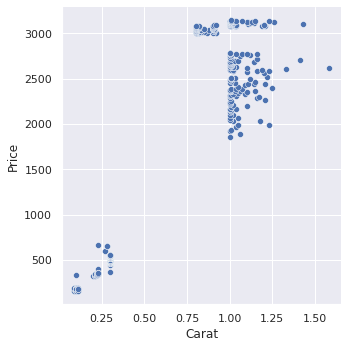

In [ ]:
sns.relplot(x="Carat", y="Price", data=df1);

Here, we can observe that there are two clusters for high caret values and low caret values for high priced diamond and low priced diamond. So, we will be dividing our dataset to two dataframe high priced and low priced. And as the professor's diamond falls into the high priced value we will continue our analysis on high priced dataset

In [ ]:
df_highprice = df1[df1['Wholesaler'] < 3]
print (df_highprice)

df_lowprice = df1[df1['Wholesaler'] > 2]
print (df_lowprice)
df_highprice1=df_highprice.drop(columns=['Wholesaler'])
df_lowprice1=df_lowprice.drop(columns=['Wholesaler'])

     Carat Colour Clarity Cut Certification Polish Symmetry  Price  Wholesaler
0     0.92      2       4   1             2      2        2   3000           1
1     0.92      2       4   2             2      1        1   3000           1
2     0.82      2       4   2             2      2        2   3004           1
3     0.81      2       3   2             2      2        2   3004           1
4     0.90      1       7   2             2      2        2   3006           1
..     ...    ...     ...  ..           ...    ...      ...    ...         ...
235   1.10      2       1   2             1      1        2   2772           2
236   1.16      2       1   2             2      1        1   2775           2
237   1.00      2       1   2             2      2        2   2779           2
238   1.00      1       3   1             1      2        1   2780           2
239   1.00      1       3   1             1      1        1   2780           2

[240 rows x 9 columns]
     Carat Colour Clarity Cu

Scatter plot for higher valued carat

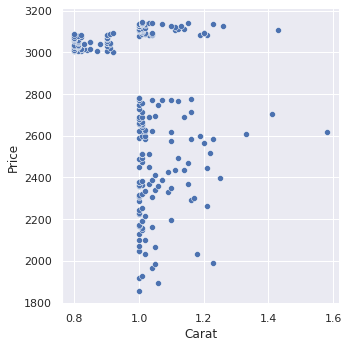

In [ ]:
sns.relplot(x="Carat", y="Price", data=df_highprice);

Linear Regression for Carat

In [ ]:
from sklearn import linear_model
df_highprice1 = df_highprice1.astype(float)
# reg = linear_model.LinearRegression()
# carat=df_highprice.Carat
# price=df_highprice.Price
# reg.fit(carat,price)
# printf(reg.coef_)
# printf(reg.intercept_)
# printf(reg.score)
carat=df_highprice.Carat
price=df_highprice.Price
carat= carat.values.reshape(-1,1)
price= price.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(carat,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(carat,price))
import statsmodels.api as sm

mod = sm.OLS(price, carat)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


[[-980.60407738]]
[3740.98432362]
0.10715927124920899
x1    1.766008e-166
Name: P>|t|, dtype: float64


Here we got a R-squared value of 10.7% which is informing us about the good significance of carat in our dataset, the negative co-efficient shows that the lighter diamonds are valued better

Linear Regression for Clarity

In [ ]:
clarity=df_highprice.Clarity
clarity= clarity.values.reshape(-1,1)

reg.fit(clarity,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(clarity,price))
import statsmodels.api as sm

mod = sm.OLS(price, clarity)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)



[[78.90917475]]
[2526.13687564]
0.13430904497595164
x1    9.319503e-80
Name: P>|t|, dtype: float64


Here we got a R-squared value of 13.4% which is informing us that it is also a pretty significant variable in our dataset

Linear Regression for Certification

In [ ]:
certification=df_highprice.Certification
certification= certification.values.reshape(-1,1)

reg.fit(certification,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(certification,price))
import statsmodels.api as sm

mod = sm.OLS(price, certification)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

[[169.66666667]]
[2502.775]
0.05354423770803973
x1    7.384366e-123
Name: P>|t|, dtype: float64


Here we got a R-squared value of 5.3% which is informing us that it is less significant than the previous two variables

Linear Regression for Cut

In [ ]:
cut=df_highprice.Cut
cut= cut.values.reshape(-1,1)

reg.fit(cut,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(cut,price))
import statsmodels.api as sm

mod = sm.OLS(price, cut)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


[[200.49333333]]
[2431.47333333]
0.07009561231946537
x1    4.286856e-134
Name: P>|t|, dtype: float64


Here we got a R-squared value of 7.0% which is informing us that it is more significant than Certification but less significant than clarity and carat, furthermore it also has a very low p_value

Linear Regression for Polish

In [ ]:
polish=df_highprice.Polish
polish= polish.values.reshape(-1,1)

reg.fit(polish,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(polish,price))
from scipy import stats

print(stats.ttest_ind(polish,price))
mod = sm.OLS(price, polish)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


[[248.54158849]]
[2381.3558474]
0.11482760462973718
Ttest_indResult(statistic=array([-116.2064331]), pvalue=array([0.]))
x1    2.129667e-128
Name: P>|t|, dtype: float64


Here we got a R-squared value of 11.4% which is informing us that it also has significance but it has higher p_values than cut and carat

Linear Regression for Symmetry

In [ ]:
symmetry=df_highprice.Symmetry
symmetry= symmetry.values.reshape(-1,1)

reg.fit(symmetry,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(symmetry,price))
import statsmodels.api as sm

mod = sm.OLS(price,symmetry)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

[[225.41426087]]
[2423.84973913]
0.09434694078262917


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


x1    5.420488e-125
Name: P>|t|, dtype: float64


Here we got a R-squared value of 9.4% which is informing us that it also has significance and it has higher p_values than polish

Linear Regression for Colour

In [ ]:
colour=df_highprice.Colour
colour= colour.values.reshape(-1,1)

reg.fit(colour,price)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(colour,price))
print(stats.ttest_ind(polish,price))
mod = sm.OLS(price, colour)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)


[[115.36237126]]
[2564.52370469]
0.02186444755978234
Ttest_indResult(statistic=array([-116.2064331]), pvalue=array([0.]))
x1    1.561377e-133
Name: P>|t|, dtype: float64


Here we got a R-squared value of 2.1% which is low but it has much lower p_value than polish

So here though Polish has good r-squared value it has higher p_values than 3'Cs except clarity but clarity has much better r-squared value so it should take precedence before Polish. So in our multiple linear model we will include all 4'c

# **Multiple Linear Regression for High Priced Diamond**

In [ ]:
df_highprice = df_highprice.astype(float)
X=df_highprice.drop(columns=['Price'])
X=X.drop(columns=['Certification'])
X=X.drop(columns=['Polish'])
X=X.drop(columns=['Wholesaler'])

X=X.drop(columns=['Symmetry'])
print(X)

     Carat  Colour  Clarity  Cut
0     0.92     2.0      4.0  1.0
1     0.92     2.0      4.0  2.0
2     0.82     2.0      4.0  2.0
3     0.81     2.0      3.0  2.0
4     0.90     1.0      7.0  2.0
..     ...     ...      ...  ...
235   1.10     2.0      1.0  2.0
236   1.16     2.0      1.0  2.0
237   1.00     2.0      1.0  2.0
238   1.00     1.0      3.0  1.0
239   1.00     1.0      3.0  1.0

[240 rows x 4 columns]


We created our training data with the 4'C which are the most important explanatory variables in our dataset

In [ ]:
y = df_highprice.Price
y

0      3000.0
1      3000.0
2      3004.0
3      3004.0
4      3006.0
        ...  
235    2772.0
236    2775.0
237    2779.0
238    2780.0
239    2780.0
Name: Price, Length: 240, dtype: float64

In [ ]:
# Creating our testing data frame by putting relevant dummy variables
X_test = {'Carat':[0.9], 'Colour':[1], 'Clarity':[4], 'Cut':[2]}

X_test=pd.DataFrame.from_dict(X_test)
X_test


,Carat,Colour,Clarity,Cut
0,0.9,1,4,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from __future__ import division
class LRPI:
    def __init__(self, normalize=False, n_jobs=1, t_value = 2.13144955):
        self.normalize = normalize
        self.n_jobs = n_jobs
        self.LR = linear_model.LinearRegression(normalize=self.normalize, n_jobs= self.n_jobs)
        self.t_value = t_value
        
    def fit(self, X_train, y_train):
        self.X_train = pd.DataFrame(X_train.values)
        self.y_train = pd.DataFrame(y_train.values)
        
        self.LR.fit(self.X_train, self.y_train)
        X_train_fit = self.LR.predict(self.X_train)
        self.MSE = np.power(self.y_train.subtract(X_train_fit), 2).sum(axis=0) / (self.X_train.shape[0] - self.X_train.shape[1] - 1)
        self.X_train.loc[:, 'const_one'] = 1
        self.XTX_inv = np.linalg.inv(np.dot(np.transpose(self.X_train.values) , self.X_train.values))
        
    def predict(self, X_test):
        self.X_test = pd.DataFrame(X_test.values)
        self.pred = self.LR.predict(self.X_test)
        self.X_test.loc[: , 'const_one'] =1
        SE = [np.dot(np.transpose(self.X_test.values[i]) , np.dot(self.XTX_inv, self.X_test.values[i]) ) for i in range(len(self.X_test)) ]
        results = pd.DataFrame(self.pred , columns=['Pred'])
        
        results.loc[:,"lower"] = results['Pred'].subtract((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        results.loc[:,"upper"] = results['Pred'].add((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(SE,self.MSE.values) )),  axis=0)
        
        return results

In [ ]:
model = LRPI()
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
results = model.predict(X_test)
results

,Pred,lower,upper
0,2832.872286,2137.614236,3528.130336


The LRPI method is giving us a 95% confidence interval for our prediction. We got a prediction of 2832.872286 which is lower than Professor's diamond price prediction. So there is a 95% chance that the price will be in-between 2137 to 3528. Therefore considering other factors like the retailing cost and the cost of ring a price between 2900dollar to 3000dollar could be offered by Professor.

## **Summary of results**

1. The most important explanatory variabbles are carat, clarity and colour. After that Cut, Polish and and Symmentry comes into play

2. We have done the analysis for high priced diamond because professor's diamond requirements fall into that.

3. We got a prediction of 2832.872286 which is lower than Professor's diamond price prediction.Therefore considering other factors like the retailing cost and the cost of ring a price between 2900dollar to 3000dollar could be offered by Professor.